In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import subprocess
import seaborn as sns
import IPython.display as display
%matplotlib inline

import matplotlib.gridspec as gridspec
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
from netCDF4 import Dataset as netcdf_dataset
from cartopy import config
from PIL import Image

In [2]:
#import data and create dictionary
# create a dictionary with the datasets
biome_list = glob('/work/jyl/proj/CMIP6_models/ESM_Biomes/*biomes*')
biome_list

['/work/jyl/proj/CMIP6_models/ESM_Biomes/CMCC_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CMCC_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CNRM_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CNRM_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CanESM_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CanESM_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/GFDL_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/GFDL_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/IPSL_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/IPSL_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/SeaWiFS_based_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/UKESM_historical_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/UKESM_ssp585_biomes_x1.nc',
 '/work/jyl/proj/CMIP6_models/ESM_Biomes/CESM2_hist_biomes_x1.nc',
 '/work/jyl/proj/

In [3]:


model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp585'] = {}

for e in ['hist', 'ssp585']:
    for m in model_list:
        model_path = [x for x in biome_list if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path)
        biomes_mask = ~np.isnan(ds_dict[e][m].biomes)
        ds_dict[e][m]['biomes'] = ds_dict[e][m]['biomes'].where((ds_dict[e][m]['lat'] < 44.5) & (ds_dict[e][m]['lat'] > -44.5), 2)
        ds_dict[e][m] = ds_dict[e][m].where(biomes_mask)
        #if m != 'GFDL':
        #ds_dict[m].reindex(lat=list(reversed(ds_dict[m].lat)))
for r, m in enumerate(model_list):
    print(m)
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(biomes_ssp5=ds_dict['ssp585'][m].biomes)

CESM
CMCC
CNRM
GFDL
GISS
IPSL
UKESM


In [4]:
ds_dict['hist'][m]

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    biomes       (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    biomes_ssp5  (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>

In [5]:
from matplotlib.colors import ListedColormap
col_dict = {1: "cornflowerblue",
            2: "limegreen",
            3: "goldenrod"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
letters = ['a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.','m.','n.']

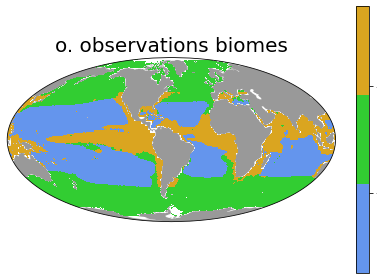

In [6]:
ds_PSSdb = xr.open_mfdataset('/work/jyl/validation_data/MLD_and_biomes/data_biomes_x1.nc')
biomes_mask = ~np.isnan(ds_PSSdb.biomes)
ds_PSSdb['biomes'] = ds_PSSdb['biomes'].where((ds_PSSdb ['lat'] < 44.5) & (ds_PSSdb['lat'] > -44.5), 2)
ds_PSSdb  = ds_PSSdb.where(biomes_mask)

fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(nrows=1, ncols=1, figure=fig)

axs = [None]*1
cs = [None]*1
for i in range(1):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')

    cs[i]=ds_PSSdb['biomes'].plot.imshow(ax=axs[i],  transform=ccrs.PlateCarree(), cmap=cm, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
    axs[i].set_title(('o. observations biomes'), fontsize=20)
    bar = plt.colorbar(cs[i])
    tick_locator = ticker.MaxNLocator(nbins=3)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(0)
        
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.01)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_biomes_observations_maps.pdf', dpi=300)

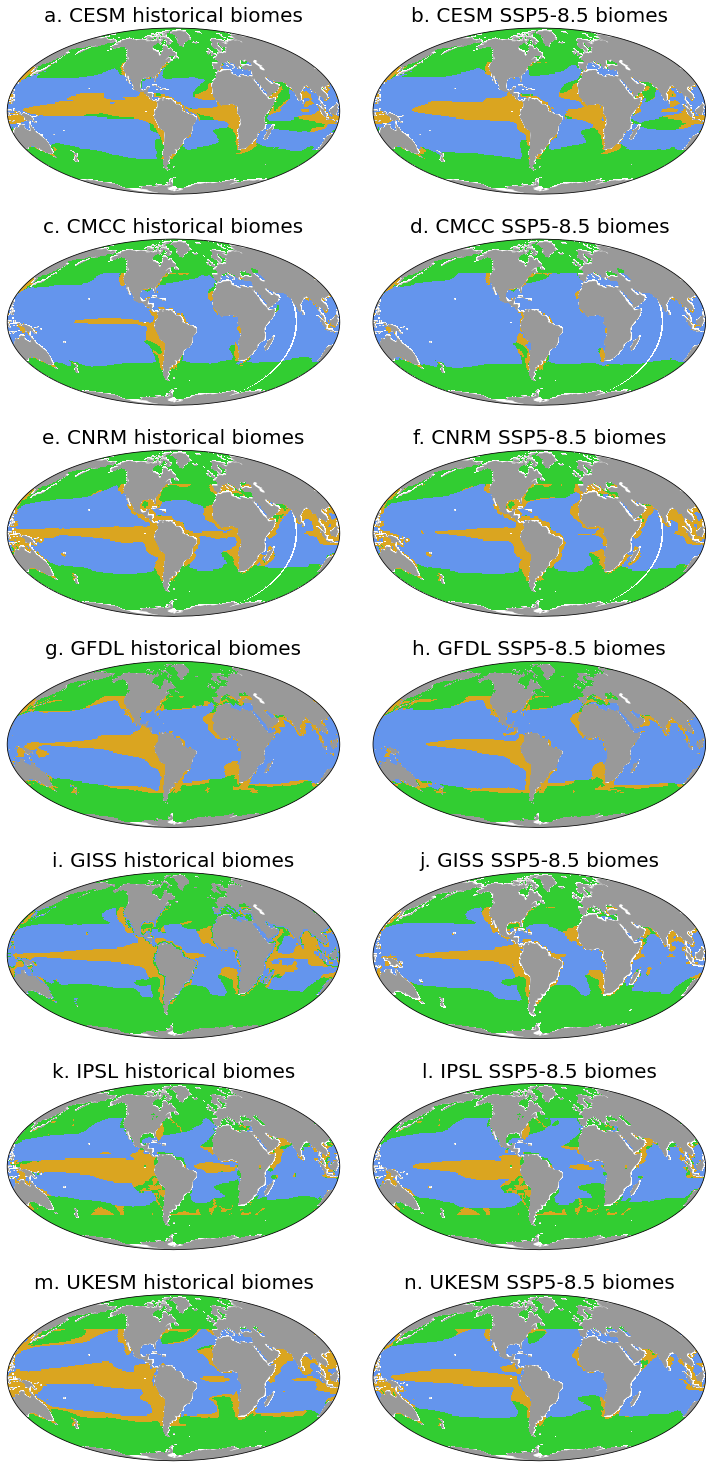

In [80]:
# dictionary that will be used to generate the dataframe. p refers to the parameter string



fig = plt.figure(figsize=(10,21))
gs = gridspec.GridSpec(nrows=7, ncols=2, figure=fig)
m=0
axs = [None]*14
cs = [None]*14
for i in range(14):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    
    if i % 2 == 0:
        cs[i]=ds_dict['hist'][model_list[m]]['biomes'].plot.imshow(ax=axs[i],  transform=ccrs.PlateCarree(), cmap=cm, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' historical biomes'), fontsize=20)

    elif i % 2 == 1:
        cs[i]=ds_dict['hist'][model_list[m]]['biomes_ssp5'].plot.imshow(ax=axs[i],  transform=ccrs.PlateCarree(),  cmap=cm, add_colorbar=False)
        axs[i].set_title((letters[i]+' '+model_list[m]+ ' SSP5-8.5 biomes'), fontsize=20)
        m+=1
    #cs[c]=ds_dict[m].biomes.plot.imshow(ax=axs[c], origin = 'lower', transform=ccrs.PlateCarree(), cmap=cm, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
    #axs[c].set_title((m), fontsize=40)

    #if i ==7:
        #bar = plt.colorbar(cs[i], shrink = 0.2)
        #tick_locator = ticker.MaxNLocator(nbins=3)
        #bar.locator = tick_locator
        #bar.update_ticks()
        #for t in bar.ax.get_yticklabels():
            #t.set_fontsize(15)
        
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.01)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_biomes_modelsmaps.pdf', dpi=300)

In [57]:
ds_dict['ssp585'].keys()

dict_keys(['CESM', 'CMCC', 'CNRM', 'GFDL', 'GISS', 'IPSL', 'UKESM'])

In [ ]:
ds_dict['hist'][model_list[m]].biomes.plot()

In [ ]:
#import data and create dictionary
# create a dictionary with the datasets
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

file_list_climatology = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology_all*')

file_list_gCarbon = list(set(file_list).difference(file_list_biovol+file_list_climatology))

In [ ]:


model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path).mean(dim=['time'])
        #if m != 'GFDL':
        #ds_dict[m].reindex(lat=list(reversed(ds_dict[m].lat)))
        
ds_dict['hist']['PSSdb']= xr.open_mfdataset('/work/jyl/validation_data/MLD_and_biomes/data_biomes_x1.nc')
biomes_mask = ~np.isnan(ds_dict['hist']['PSSdb'].biomes)
ds_dict['hist']['PSSdb']['biomes'] = ds_dict['hist']['PSSdb']['biomes'].where((ds_dict['hist']['PSSdb']['lat'] < 44.5) & (ds_dict['hist']['PSSdb']['lat'] > -44.5), 2)
ds_dict['hist']['PSSdb'] = ds_dict['hist']['PSSdb'].where(biomes_mask)
ds_dict['hist']['PSSdb'].biomes.plot()

In [ ]:
ds_dict['hist']['GFDL'] = ds_dict['hist']['GFDL'].assign_coords(lat=(ds_dict['hist']['GFDL'].lat * -1))

source_list= ['CESM','CMCC', 'CNRM', 'GFDL','GISS', 'IPSL', 'UKESM', 'PSSdb']

fig = plt.figure(figsize=(32,16))
gs = gridspec.GridSpec(nrows=2, ncols=4, figure=fig)

axs = [None]*8
cs = [None]*8
for c , m in enumerate(source_list): 
    ax_n = axs[c]
    axs[c] = plt.subplot(gs[c],projection=ccrs.Mollweide(central_longitude=300))
    axs[c].add_feature(cfeature.LAND,  facecolor='#999999')
    
    cs[c]=ds_dict['hist'][m].biomes.plot.imshow(ax=axs[c], origin = 'lower', transform=ccrs.PlateCarree(), cmap=cm, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
    axs[c].set_title((m), fontsize=40)
    #if c ==7:
        #bar = plt.colorbar(cs[c], shrink = 0.2)
        #tick_locator = ticker.MaxNLocator(nbins=3)
        #bar.locator = tick_locator
        #bar.update_ticks()
        #for t in bar.ax.get_yticklabels():
            #t.set_fontsize(15)
        
plt.tight_layout()
fig.subplots_adjust(hspace=-0.55)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_biomes_maps_HCSS_mod.pdf', dpi=300)